In [1]:
# Importamos librerias.
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

# Descripción del dataset analizado.
"""Proporciona datos sobre la población, la esperanza de vida y 
el PIB en los diferentes países del mundo desde 1952 hasta 2007."""


# Importamos dataset.
path = r'C:\Users\adria\Desktop\Python\python_curso60h - Barcelona activa\Datasets\dataset_entrega_seaborn.csv'
df = pd.read_csv(path)

# Añadir columna con el logaritmo del PIB per cápita.
df = df.assign(log_gdp = lambda df: np.log(df["gdpPercap"]))

df.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdp
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625


C:\Users\adria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\adria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


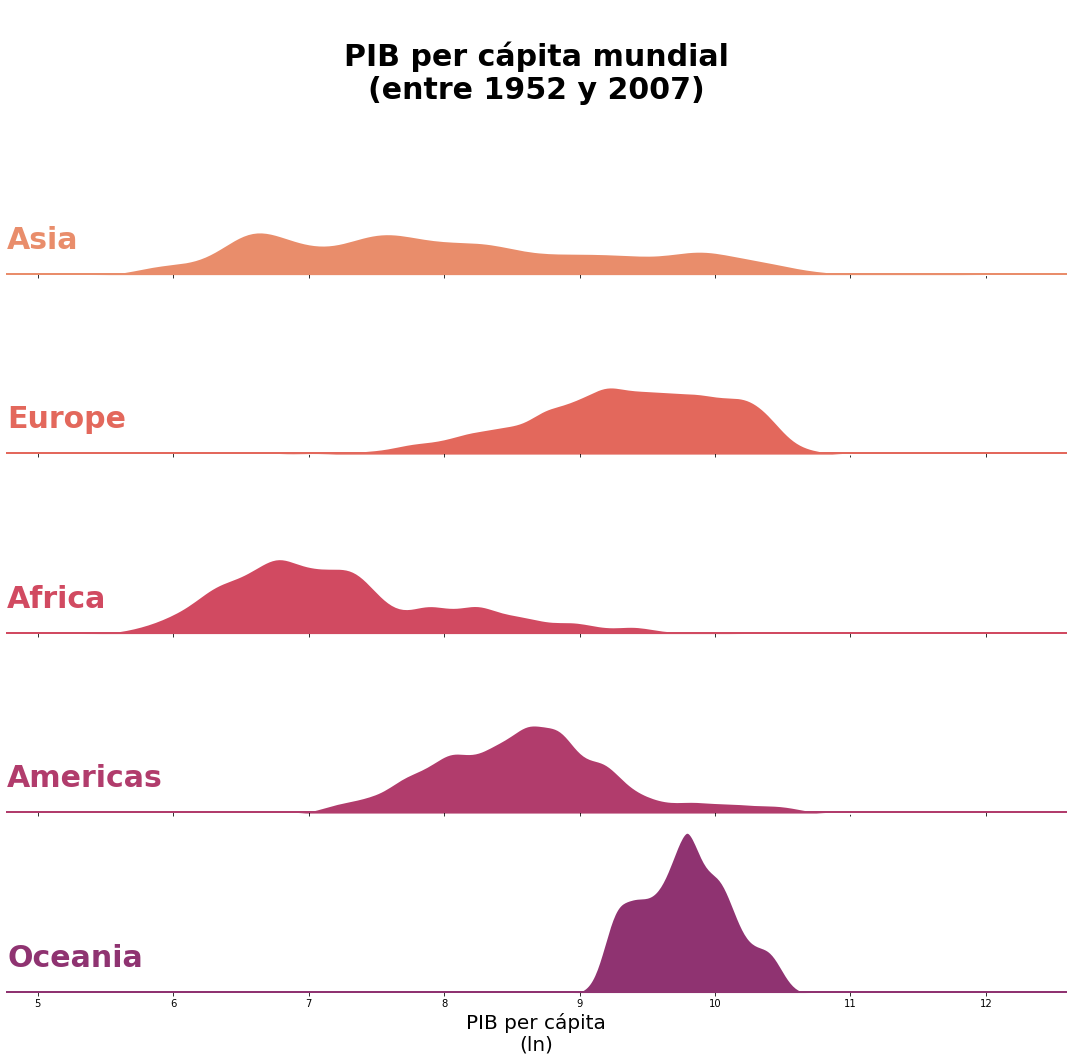

In [2]:
################################ GRÁFICO 1 ################################


# Descripción del gráfico:
"""En el gráfico podremos ver la evolución del PIB per cápita entre
los años 1952 y 2007, en los diferentes continentes del planeta"""

# Selección del subconjunto del df que queremos graficar.
df1 = df[['log_gdp','continent']]

# Creación de la paleta para el gráfico.
pal = sns.color_palette("flare") 

# Creación del gráfico.
g = sns.FacetGrid(df1, 
                  row="continent", 
                  hue="continent", 
                  aspect=15,
                  height=.5, 
                  palette=pal)

g.map(sns.kdeplot, "log_gdp",
      bw_adjust=.5, 
      clip_on=False,
      fill=True, 
      alpha=1, 
      linewidth=1.5)

g.map(sns.kdeplot, "log_gdp", 
      clip_on=False, 
      color="w", 
      lw=5, 
      bw_adjust=.5)

g.map(plt.axhline,
      y=0, lw=2, 
      clip_on=False)

def label(lifeExp, color, label):
    ax = plt.gca()
    ax.text(0, .2, 
            label, 
            fontweight="bold", 
            color=color,
            ha="left", 
            va="center", 
            transform=ax.transAxes,
            fontsize=30)
    
g.fig.set_size_inches(15,15)

g.map(label, "log_gdp")


# Eliminamos los títulos que no queremos.
g.set_titles("")
g.set(yticks=[])

# Indicar los despines que queremos quitar.
g.despine(bottom=True, 
          left=True) 

# títulos
g.fig.suptitle('\nPIB per cápita mundial\n(entre 1952 y 2007)', 
               fontsize=30,
               weight='bold')

plt.xlabel('PIB per cápita\n(ln)',
           fontsize=20)

# Ajusta gráfico a la figura.
plt.tight_layout()

plt.show()

C:\Users\adria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)
<ipython-input-3-f405d2824f11>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


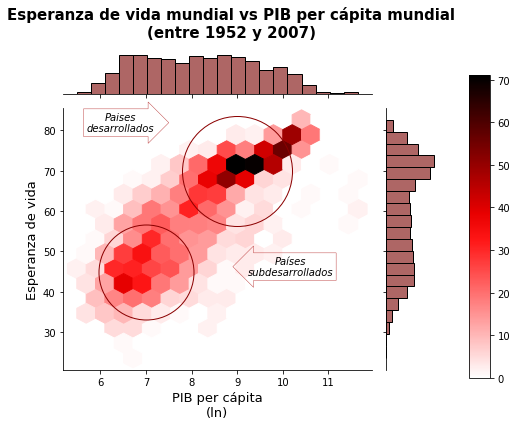

In [3]:
################################ GRÁFICO 2 ################################

# Gráfico
h = sns.jointplot(x="log_gdp", 
                y="lifeExp", 
                data=df,
                kind="hex", 
                joint_kws={"gridsize": 15},
                color='r',
                alpha=1,
                marginal_ticks=False,
                marginal_kws=dict(bins=20, 
                                  rug=False, 
                                  color='#933331')) #RGB

# Títulos y dimensión figura
h.set_axis_labels('PIB per cápita\n(ln)', 'Esperanza de vida', fontsize=13)
h.fig.suptitle('Esperanza de vida mundial vs PIB per cápita mundial\n(entre 1952 y 2007)',fontsize=15, weight= 'bold')
h.fig.set_size_inches(6,6)

# Barra lateral
cbar_ax = h.fig.add_axes([1.05, .12, .05, .7])
plt.colorbar(cax=cbar_ax)

# Anotación 1
plt.annotate(f"Paises\ndesarrollados",
             fontstyle='italic', 
             xy=(5, 5),
             bbox=dict(boxstyle="rarrow",
                       fc="none", 
                       ec="firebrick", 
                       lw=0.4),
             xytext=(-350,225), 
             textcoords='offset points', 
             ha='center')

# Círculo 1
h.ax_joint.plot([9],[70],
                'o',
                ms=110,
                mec='darkred',
                mfc='none')

# Anotación 2
plt.annotate(f"Países\nsubdesarrollados",
             fontstyle = 'italic', 
             xy=(5, 5),
             bbox=dict(boxstyle="larrow",
                       fc="none", 
                       ec="firebrick",
                       lw=0.4),
             xytext=(-180,81), 
             textcoords='offset points', 
             ha='center')

# Círculo 2
h.ax_joint.plot([7],[45],
                'o',
                ms = 95,
                mec = 'darkred',
                mfc='none')

# Ajusta subplot a la figura.
plt.tight_layout()

plt.show()

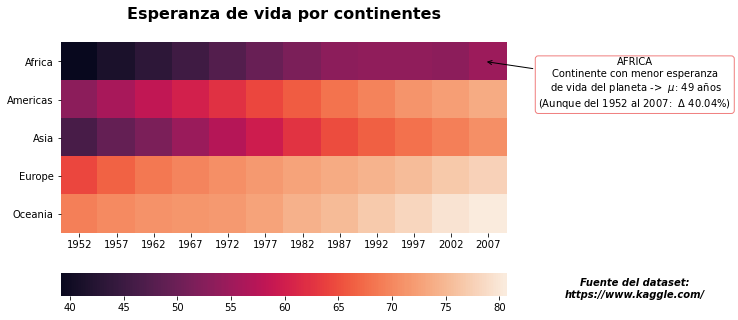

In [4]:
################################ GRÁFICO 3 ################################

# Selección del subconjunto del df que queremos graficar.
df2 = df[['continent', 'year','lifeExp']]

# Creación figura
fig = plt.figure(figsize=(8,5))

heatmap_data = pd.pivot_table(df2, values = 'lifeExp', 
                     index = ['continent'], 
                     columns='year')


## Datos que he utilizado para las anotaciones en el gráfico ##

# 1. Media de la esperanza de vida en África.
africa_data = df2[df2['continent'] == 'Africa']
mean_africa = int(round(africa_data['lifeExp'].mean(),0)) 

# 2. Incremento de la esperanza de vida (1952 - 2007) en África.
año_2007= africa_data[africa_data['year'] == 2007]
año_1952 = africa_data[africa_data['year'] == 1952]
evolucionAfrica_lifeExp = round((año_2007['lifeExp'].mean()-año_1952['lifeExp'].mean())/año_1952['lifeExp'].mean()*100,2) 


# Media de esperanza de vida mundial (la utilizo para que sea el centro en el heatmap)
mean = round(df['lifeExp'].mean(),2) 

# Gráfico
sns.heatmap(heatmap_data, 
            cmap="rocket", 
            linewidths= 0.00,
            fmt= "",
            cbar_kws= {'orientation': 'horizontal'}, 
            center=mean
           )

# Anotación 1 (con símbolos: mu = media y delta = incremento)
plt.annotate(f"AFRICA\nContinente con menor esperanza\n de vida del planeta ->  $\mu$: {mean_africa} años\n(Aunque del 1952 al 2007:  $\Delta$ {evolucionAfrica_lifeExp}%)",
             fontstyle = 'normal', 
             xy=(11.4, 0.5),
             bbox=dict(boxstyle="round",
                       fc="none", 
                       ec="lightcoral"),
             xytext=(150,-45), 
             textcoords='offset points', 
             ha='center',
             arrowprops=dict(arrowstyle="->",
                            facecolor= 'lightcoral'))

# Anotación 2
plt.annotate(f"\n\nFuente del dataset:\nhttps://www.kaggle.com/",
             fontstyle = 'italic', 
             xy=(11,5.0),
             xytext=(165, -65), 
             textcoords='offset points', 
             ha='center',
             fontsize=10,
             weight= 'bold'
             )
# títulos
plt.title('Esperanza de vida por continentes\n', fontsize=16, weight= 'bold')
plt.xlabel("")
plt.ylabel("")


plt.show()